# STA141C Final Project: Crime in Chicago
### A clustering analysis and visualization for crime in Chicago from 2005-2017
By: Joe Akanesuvan, Navid Al Nadvi, Sailesh Patnala



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [59]:
crimes1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)
crimes2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
crimes3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)
crimes = pd.concat([crimes1, crimes2, crimes3], ignore_index=False, axis=0)

crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


## Understanding the Dataset

In [46]:
crimes.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [47]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336556 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              int64
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(4), object(10)
memory usage: 736.1+ MB


There are unnecessary columns which would not be able to use for any relevant visualization nor any clustering algorithm. Remove any columns which may be too specific.

In [60]:
crimes.drop(['Unnamed: 0', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate',
             'Updated On','FBI Code', 'Beat','Ward', 'Location', 'District', 'Block',
             'Latitude', 'Longitude', 'Year'], inplace=True, axis=1)

Since there is Date column, the Date format should be changed to its corresponding Pandas format

In [61]:
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
crimes.index = pd.DatetimeIndex(crimes.Date)

In [62]:
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area
Date,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,11.0
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,42.0
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,69.0
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,BATTERY,SIMPLE,RESIDENCE,False,False,17.0
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,65.0


## Visualizing the Data

In [70]:
crime_years = pd.DataFrame(crimes.groupby([crimes.index.year]).size().reset_index(name="count"))


In [64]:
crime_years

,index,count
0,2005,453666
1,2006,448037
2,2007,436924
3,2008,426964
4,2009,392556
5,2010,370140
6,2011,351555
7,2012,335670
8,2013,306703
9,2014,274527


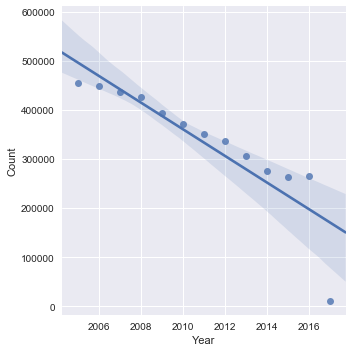

In [69]:
lp = sns.lmplot(x='index', y='count', data=crime_years)
lp.set_axis_labels('Year', 'Count')